### Determine Feature Importance

In [103]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [65]:
""" Function to create the technical indicators """
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['price'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = pd.DataFrame.ewm(df_price['price'], span=26).mean()
    dataset['12ema'] = pd.DataFrame.ewm(df_price['price'], span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    
    # Create Bollinger Bands
    dataset['20sd'] = dataset['price'].rolling(window=20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['price']-1
    
    return dataset

In [66]:
df = pd.read_csv(os.path.join('./mli/data','aa.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])

In [67]:
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,2.2972,2.3178,2.2972,2.2972
1,1970-01-05,2.2972,2.2972,2.2544,2.2759
2,1970-01-06,2.2759,2.2759,2.2342,2.2342
3,1970-01-07,2.2342,2.2342,2.2342,2.2342
4,1970-01-08,2.2342,2.2342,2.2139,2.2139


In [68]:
df

,Date,Open,High,Low,Close
0,1970-01-02,2.2972,2.3178,2.2972,2.2972
1,1970-01-05,2.2972,2.2972,2.2544,2.2759
2,1970-01-06,2.2759,2.2759,2.2342,2.2342
3,1970-01-07,2.2342,2.2342,2.2342,2.2342
4,1970-01-08,2.2342,2.2342,2.2139,2.2139
...,...,...,...,...,...
12069,2017-11-06,47.2000,47.6800,46.5300,47.2900
12070,2017-11-07,47.1100,47.2042,46.5400,46.9700
12071,2017-11-08,46.7300,46.7700,45.3700,45.8900
12072,2017-11-09,44.7100,44.7100,43.1100,43.3300


In [69]:
df_price = pd.DataFrame(df, columns=['Close'])
df_price.rename(columns={'Close': 'price'}, inplace=True)

In [70]:
df_price.head()

,price
0,2.2972
1,2.2759
2,2.2342
3,2.2342
4,2.2139


In [71]:
df_price_ti = get_technical_indicators(df_price)

In [74]:
df_price_ti[0:50]

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
0,2.2972,NaN,NaN,2.297200,2.297200,0.000000,NaN,NaN,NaN,2.297200,1.2972
1,2.2759,NaN,NaN,2.286140,2.285662,-0.000478,NaN,NaN,NaN,2.281225,1.2759
2,2.2342,NaN,NaN,2.267479,2.265577,-0.001902,NaN,NaN,NaN,2.248669,1.2342
3,2.2342,NaN,NaN,2.258175,2.255672,-0.002503,NaN,NaN,NaN,2.238903,1.2342
4,2.2139,NaN,NaN,2.247908,2.244323,-0.003585,NaN,NaN,NaN,2.222165,1.2139
5,2.1921,NaN,NaN,2.236730,2.231630,-0.005100,NaN,NaN,NaN,2.202094,1.1921
6,2.1717,2.231314,NaN,2.225165,2.218257,-0.006908,NaN,NaN,NaN,2.181822,1.1717
7,2.1921,2.216300,NaN,2.219837,2.212798,-0.007039,NaN,NaN,NaN,2.188675,1.1921
8,2.1717,2.201414,NaN,2.212702,2.204668,-0.008035,NaN,NaN,NaN,2.177358,1.1717
9,2.1921,2.195400,NaN,2.209859,2.202286,-0.007573,NaN,NaN,NaN,2.187186,1.1921


In [75]:
df_features = df_price_ti.dropna()

In [92]:
lag = -1
df_features.loc[:,'target'] = df_features.loc[:,"price"].shift(periods=lag).copy()
df_features.head()

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,target
20,2.0883,2.153571,2.192390,2.174064,2.154701,-0.019363,0.050162,2.292714,2.092067,2.093582,1.0883,2.1088
21,2.1088,2.132771,2.183419,2.168140,2.147456,-0.020685,0.048490,2.280398,2.086440,2.103727,1.1088,2.1508
22,2.1508,2.123757,2.177462,2.166592,2.147981,-0.018611,0.047039,2.271539,2.083385,2.135109,1.1508,2.1292
23,2.1292,2.117686,2.172462,2.163304,2.145039,-0.018265,0.045885,2.264232,2.080692,2.131170,1.1292,2.1088
24,2.1088,2.114771,2.166490,2.158576,2.139377,-0.019200,0.046531,2.259552,2.073428,2.116257,1.1088,2.1088


In [93]:
df_features.tail()

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,target
12069,47.29,47.525714,47.796667,47.319525,47.713968,0.394443,0.871466,49.539599,46.053734,47.280792,46.29,46.97
12070,46.97,47.391429,47.791905,47.293634,47.599511,0.305877,0.867083,49.526070,46.057739,47.073597,45.97,45.89
12071,45.89,47.172857,47.744286,47.189661,47.336509,0.146848,0.951893,49.648071,45.840500,46.284532,44.89,43.33
12072,43.33,46.537143,47.572381,46.903761,46.720123,-0.183637,1.378628,50.329637,44.815125,44.314844,42.33,43.01
12073,43.01,45.867143,47.357143,46.615334,46.149335,-0.465999,1.714082,50.785308,43.928978,43.444948,42.01,NaN


In [94]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12054 entries, 20 to 12073
Data columns (total 12 columns):
price         12054 non-null float64
ma7           12054 non-null float64
ma21          12054 non-null float64
26ema         12054 non-null float64
12ema         12054 non-null float64
MACD          12054 non-null float64
20sd          12054 non-null float64
upper_band    12054 non-null float64
lower_band    12054 non-null float64
ema           12054 non-null float64
momentum      12054 non-null float64
target        12053 non-null float64
dtypes: float64(12)
memory usage: 1.5 MB


In [95]:
df_f = df_features.dropna()

In [96]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12053 entries, 20 to 12072
Data columns (total 12 columns):
price         12053 non-null float64
ma7           12053 non-null float64
ma21          12053 non-null float64
26ema         12053 non-null float64
12ema         12053 non-null float64
MACD          12053 non-null float64
20sd          12053 non-null float64
upper_band    12053 non-null float64
lower_band    12053 non-null float64
ema           12053 non-null float64
momentum      12053 non-null float64
target        12053 non-null float64
dtypes: float64(12)
memory usage: 1.2 MB


In [97]:
df_f.head()

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,target
20,2.0883,2.153571,2.192390,2.174064,2.154701,-0.019363,0.050162,2.292714,2.092067,2.093582,1.0883,2.1088
21,2.1088,2.132771,2.183419,2.168140,2.147456,-0.020685,0.048490,2.280398,2.086440,2.103727,1.1088,2.1508
22,2.1508,2.123757,2.177462,2.166592,2.147981,-0.018611,0.047039,2.271539,2.083385,2.135109,1.1508,2.1292
23,2.1292,2.117686,2.172462,2.163304,2.145039,-0.018265,0.045885,2.264232,2.080692,2.131170,1.1292,2.1088
24,2.1088,2.114771,2.166490,2.158576,2.139377,-0.019200,0.046531,2.259552,2.073428,2.116257,1.1088,2.1088


In [99]:
df_f.tail()

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,target
12068,47.12,47.791429,47.806190,47.321887,47.791053,0.469166,0.880028,49.566245,46.046135,47.262376,46.12,47.29
12069,47.29,47.525714,47.796667,47.319525,47.713968,0.394443,0.871466,49.539599,46.053734,47.280792,46.29,46.97
12070,46.97,47.391429,47.791905,47.293634,47.599511,0.305877,0.867083,49.526070,46.057739,47.073597,45.97,45.89
12071,45.89,47.172857,47.744286,47.189661,47.336509,0.146848,0.951893,49.648071,45.840500,46.284532,44.89,43.33
12072,43.33,46.537143,47.572381,46.903761,46.720123,-0.183637,1.378628,50.329637,44.815125,44.314844,42.33,43.01


In [102]:
df_f.target

20        2.1088
21        2.1508
22        2.1292
23        2.1088
24        2.1088
          ...   
12068    47.2900
12069    46.9700
12070    45.8900
12071    43.3300
12072    43.0100
Name: target, Length: 12053, dtype: float64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df_f.drop(['target'],axis=1), df_f.target, 
                                                    test_size=.3, random_state=0, shuffle=False)

In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8437, 11), (3616, 11), (8437,), (3616,))

In [134]:
from xgboost import XGBRegressor
regressor = XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

xgbModel = regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose=False)

[21:51:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


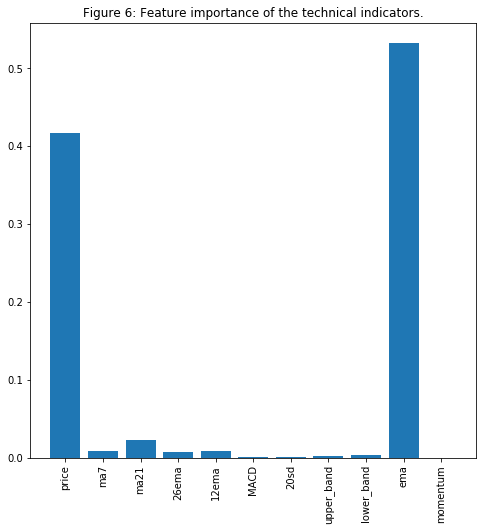

In [112]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

### The data was not normalized. Let's see what changes if we properly normalize the data first.

In [114]:
df_n = pd.read_csv(os.path.join('./mli/data','aa.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])

In [116]:
df_n

,Date,Open,High,Low,Close
0,1970-01-02,2.2972,2.3178,2.2972,2.2972
1,1970-01-05,2.2972,2.2972,2.2544,2.2759
2,1970-01-06,2.2759,2.2759,2.2342,2.2342
3,1970-01-07,2.2342,2.2342,2.2342,2.2342
4,1970-01-08,2.2342,2.2342,2.2139,2.2139
...,...,...,...,...,...
12069,2017-11-06,47.2000,47.6800,46.5300,47.2900
12070,2017-11-07,47.1100,47.2042,46.5400,46.9700
12071,2017-11-08,46.7300,46.7700,45.3700,45.8900
12072,2017-11-09,44.7100,44.7100,43.1100,43.3300


In [118]:
df_price_n = pd.DataFrame(df_n, columns=['Close'])
df_price_n.rename(columns={'Close': 'price'}, inplace=True)

In [119]:
x_scaler = MinMaxScaler()
df_price_n = x_scaler.fit_transform(df_price_n)
df_price_n

array([[0.01069959],
       [0.01048138],
       [0.01005417],
       ...,
       [0.45729588],
       [0.43106939],
       [0.42779107]])

In [120]:
df_price_n.shape

(12074, 1)

In [123]:
df_price_ti_n = get_technical_indicators(pd.DataFrame(df_price_n, columns=['price']))

In [124]:
df_price_ti_n

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
0,0.010700,NaN,NaN,2.297200,2.297200,0.000000,NaN,NaN,NaN,0.010700,-0.989300
1,0.010481,NaN,NaN,2.286140,2.285662,-0.000478,NaN,NaN,NaN,0.010536,-0.989519
2,0.010054,NaN,NaN,2.267479,2.265577,-0.001902,NaN,NaN,NaN,0.010202,-0.989946
3,0.010054,NaN,NaN,2.258175,2.255672,-0.002503,NaN,NaN,NaN,0.010102,-0.989946
4,0.009846,NaN,NaN,2.247908,2.244323,-0.003585,NaN,NaN,NaN,0.009931,-0.990154
...,...,...,...,...,...,...,...,...,...,...,...
12069,0.471639,0.474053,0.476829,47.319525,47.713968,0.394443,0.008928,0.494685,0.458973,0.471544,-0.528361
12070,0.468360,0.472678,0.476780,47.293634,47.599511,0.305877,0.008883,0.494546,0.459014,0.469422,-0.531640
12071,0.457296,0.470438,0.476293,47.189661,47.336509,0.146848,0.009752,0.495796,0.456789,0.461338,-0.542704
12072,0.431069,0.463926,0.474531,46.903761,46.720123,-0.183637,0.014124,0.502779,0.446284,0.441159,-0.568931


In [125]:
df_features_n = df_price_ti_n.dropna()

In [126]:
lag = -1
df_features_n.loc[:,'target'] = df_features_n.loc[:,"price"].shift(periods=lag).copy()
df_features_n.head()

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,target
20,0.008559,0.009228,0.009626,2.174064,2.154701,-0.019363,0.000514,0.010654,0.008598,0.008614,-0.991441,0.008769
21,0.008769,0.009015,0.009534,2.168140,2.147456,-0.020685,0.000497,0.010527,0.008540,0.008718,-0.991231,0.009200
22,0.009200,0.008923,0.009473,2.166592,2.147981,-0.018611,0.000482,0.010437,0.008509,0.009039,-0.990800,0.008978
23,0.008978,0.008861,0.009422,2.163304,2.145039,-0.018265,0.000470,0.010362,0.008482,0.008999,-0.991022,0.008769
24,0.008769,0.008831,0.009361,2.158576,2.139377,-0.019200,0.000477,0.010314,0.008407,0.008846,-0.991231,0.008769


In [127]:
df_f_n = df_features_n.dropna()

In [130]:
df_f_n.shape, df_f.shape

((12053, 12), (12053, 12))

In [131]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(df_f_n.drop(['target'],axis=1), df_f_n.target, 
                                                    test_size=.3, random_state=0, shuffle=False)

In [135]:
regressor_n = XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

xgbModel_n = regressor_n.fit(X_train_n, y_train_n, eval_set = [(X_train_n, y_train_n), (X_test_n, y_test_n)], verbose=False)

[21:52:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


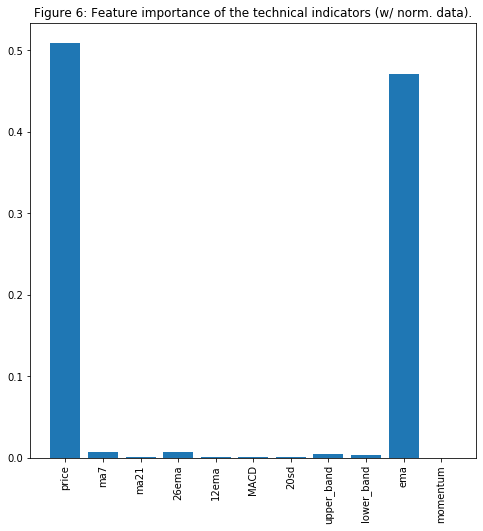

In [136]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel_n.feature_importances_))], xgbModel_n.feature_importances_.tolist(), tick_label=X_test_n.columns)
plt.title('Figure 6: Feature importance of the technical indicators (w/ norm. data).')
plt.show()

In [142]:
# remove price, ema, momentum for feature importance test
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(df_f_n.drop(['price', 'ema', 'momentum', 'target'],axis=1), df_f_n.target, 
                                                    test_size=.3, random_state=0, shuffle=False)

[21:59:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


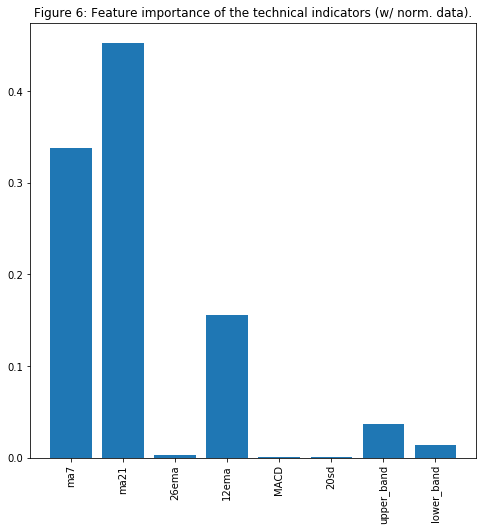

In [143]:
regressor_n = XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel_n = regressor_n.fit(X_train_n, y_train_n, eval_set = [(X_train_n, y_train_n), (X_test_n, y_test_n)], verbose=False)
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel_n.feature_importances_))], xgbModel_n.feature_importances_.tolist(), tick_label=X_test_n.columns)
plt.title('Figure 6: Feature importance of the technical indicators (w/ norm. data).')
plt.show()